K Nearest Neighbors Model

In [35]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [36]:
# load data
file_name = os.path.join(os.getcwd(), "final_dataset.csv")
df = pd.read_csv(file_name, header=0)

df.head()

,State,County,Week,cases_per_100K_7_day_count_change,Avg Temp,Temp Flux,Pandemic Indicator
0,Alabama,Autauga,2022-10-20,53.70,14.82,-0.24,0
1,Alabama,Autauga,2022-10-27,50.12,14.58,-0.24,0
2,Alabama,Autauga,2022-11-03,55.49,16.88,2.30,0
3,Alabama,Autauga,2022-11-10,107.39,19.69,2.81,1
4,Alabama,Autauga,2022-11-17,37.59,10.04,-9.65,0


In [37]:
# Definding features and labels
y = df['Pandemic Indicator']
X = df[['Avg Temp']]

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [38]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)

    return acc_score

In [39]:
k_values = [6**i for i in range(5)]

acc = [] 

for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc.append(float(score))

k=1, accuracy score: 0.522022022022022
k=6, accuracy score: 0.5397182897182897
k=36, accuracy score: 0.5712140712140712
k=216, accuracy score: 0.5894823394823395
k=1296, accuracy score: 0.5933075933075933


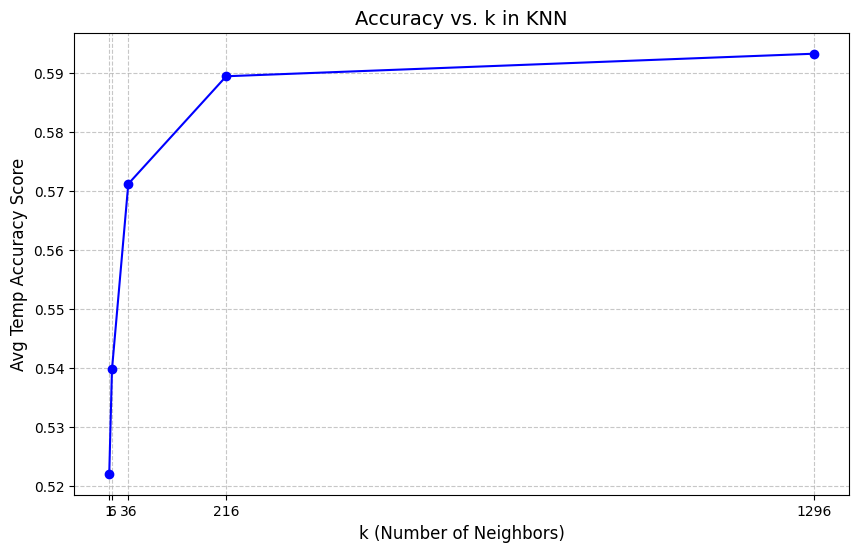

In [ ]:
# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, acc, marker='o', linestyle='-', color='b')
plt.title('Avg Temp Accuracy vs. k in KNN', fontsize=14)
plt.xlabel('k (Number of Neighbors)', fontsize=12)
plt.ylabel('Avg Temp Accuracy Score', fontsize=12)
plt.xticks(k_values)  # Ensure all k values appear on x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Temp Flux

In [41]:
# Definding features and labels
y1 = df['Pandemic Indicator']
X1 = df[['Temp Flux']]

# Splitting dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [42]:
k_values = [6**i for i in range(5)]

acc = [] 

for k in k_values:
    score = train_test_knn(X1_train, X1_test, y1_train, y1_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc.append(float(score))

k=1, accuracy score: 0.5239167739167739
k=6, accuracy score: 0.5401830401830402
k=36, accuracy score: 0.5435077935077935
k=216, accuracy score: 0.5472615472615473
k=1296, accuracy score: 0.5529100529100529


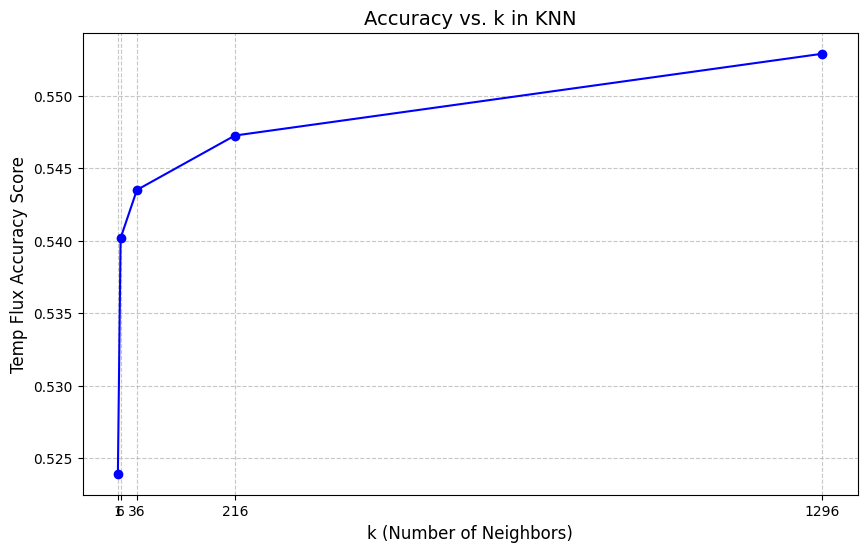

In [ ]:
# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, acc, marker='o', linestyle='-', color='b')
plt.title('Temp Flux Accuracy vs. k in KNN', fontsize=14)
plt.xlabel('k (Number of Neighbors)', fontsize=12)
plt.ylabel('Temp Flux Accuracy Score', fontsize=12)
plt.xticks(k_values)  # Ensure all k values appear on x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()